In [40]:
import matplotlib.pyplot as plt
import numpy as np

EPS = 1E-9

# Перевод кода из С в Python
# с изменениями под график
# ==========================
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

class Circle:
    def __init__(self, center, radius):
        self.center = center
        self.radius = radius

class Line:
    def __init__(self, a, b, c):
        self.a = a
        self.b = b
        self.c = c

def plot_circle(circle):
    theta = np.linspace(0, 2 * np.pi, 100)
    x = circle.center.x + circle.radius * np.cos(theta)
    y = circle.center.y + circle.radius * np.sin(theta)
    plt.plot(x, y, label='Circle')

def plot_tangent(line, xa, xb, ya, yb):
    if line.b != 0:
        x = np.linspace(xa - 10, xb + 10, 100)
        y = (-line.a * x - line.c) / line.b
    else:
        x = np.full(100, -line.c / line.a)
        y = np.linspace(ya - 10, yb + 10, 100)
    plt.plot(x, y, '--', label='Tangent')

def tangents(c, r1, r2):
    ans = []
    r = r2 - r1
    z = c.x**2 + c.y**2
    d = z - r**2
    if d < -EPS:
        return ans
    d = np.sqrt(np.abs(d))
    l = Line(0, 0, 0)
    l.a = (c.x * r + c.y * d) / z
    l.b = (c.y * r - c.x * d) / z
    l.c = r1
    ans.append(l)
    return ans

def find_tangents(circle_a, circle_b):
    ans = []
    for i in [-1, 1]:
        for j in [-1, 1]:
            c = Point(circle_b.center.x - circle_a.center.x, circle_b.center.y - circle_a.center.y)
            ans.extend(tangents(c, circle_a.radius * i, circle_b.radius * j))
    for line in ans:
        line.c -= line.a * circle_a.center.x + line.b * circle_a.center.y
    return ans
# ==========================

def graf(xa, ya, ra, xb, yb, rb):
    
    # Создаем окружности
    circle_a = Circle(Point(xa, ya), ra)
    circle_b = Circle(Point(xb, yb), rb)

    # Рисуем окружности
    plot_circle(circle_a)
    plot_circle(circle_b)

    # Находим и рисуем касательные линии
    tangents_ab = find_tangents(circle_a, circle_b)
    for line in tangents_ab:
        plot_tangent(line, xa, xb, ya, yb)

    # Настройки графика
    plt.axis('equal')
    plt.legend()
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('y')

    plt.xlim(xa - 10, xb + 10)
    plt.ylim(ya - 10, yb + 10)
    
    #plt.xlim(-1, 1)
    #plt.ylim(1, 4)

    # Увеличение границ графика
    plt.tight_layout()

    # Показать график
    plt.show()


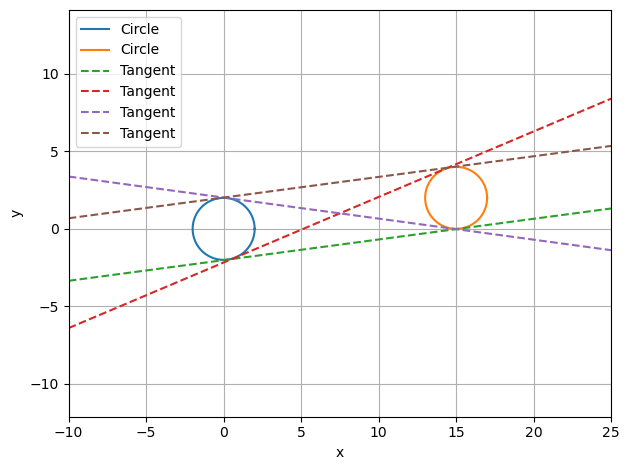

In [41]:
graf(0, 0, 2, 15, 2, 2)